In [1]:
from astrohut import *
%matplotlib

Using matplotlib backend: Qt5Agg


In [110]:
N = 4096
M_T = 5e10/1e7
M = 2.0*M_T/N #two galaxies
G = 44.97
epsilon = 0.01

system, speeds = example(N, M, G)

In [3]:
sim = simulation(M, G, epsilon, tolerance = 1.0, pos = system, speeds = speeds)

In [4]:
sim.start(0, 5.0, 0.01)

data = read_output()
N_data = len(data)
step = 1
if N_data > 1000:
    step = int(N_data/1000)
    
ani = animate(data, N)
ani.save("approx.mp4", writer = "ffmpeg", fps = 24, dpi = 120)

In [5]:
sim.tolerance = 0

sim.start(0, 5.10, 0.01)

data = read_output()
N_data = len(data)
step = 1
if N_data > 1000:
    step = int(N_data/1000)
    
ani = animate(data, N)
ani.save("exact.mp4", writer = "ffmpeg", fps = 24, dpi = 120)

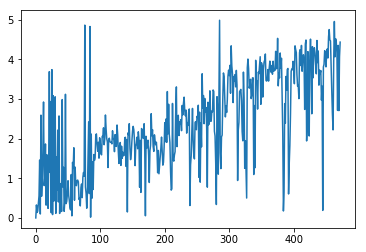

In [194]:
n = len(glob("Data/*_energy.dat"))
energy = np.zeros(n-1)

for i in range(n-1):
    with open("Data/%d_energy.dat"%i, "r") as r:
        value = r.read()
        energy[i] = float(value)
        
energy_norm = abs((energy[0] - energy)/energy[0])

%matplotlib inline
plt.plot(20*energy_norm)

In [ ]:
import scipy.signal.